In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d
import scipy.stats as stats

In [2]:
plt.rcParams.update({'font.size': 13})

In [3]:
AI_performances_good = {'1': 10, '2': 10, '3': 9, '4': 8, '5': 10, '6': 11, '7': 6, '8': 8, '9': 6,
                        '10': 9, '11': 9, '12': 10, '13': 11, '14': 10, '15': 11, '16': 11}

AI_performances_bad = {'1': 2, '2': 3, '3': 5, '4': 4, '5': 8, '6': 6, '7': 4, '8': 7, '9': 3,
                       '10': 3, '11': 5, '12': 4, '13': 5, '14': 9, '15': 7, '16': 9}

human_performances_good = [{'1': 10, '2': 9, '3': 5, '4': 5, '5': 10, '6': 11, '7': 8, '8': 9, '9': 6, '10': 8, '11': 8, '12': 5, '13': 12, '14': 10, '15': 12, '16': 9},
{'1': 10, '2': 11, '3': 6, '4': 9, '5': 9, '6': 7, '7': 7, '8': 7, '9': 9, '10': 9, '11': 8, '12': 9, '13': 12, '14': 11, '15': 12, '16': 11},
{'1': 11, '2': 8, '3': 10, '4': 7, '5': 10, '6': 11, '7': 7, '8': 9, '9': 7, '10': 10, '11': 8, '12': 9, '13': 12, '14': 10, '15': 11, '16': 11},
{'1': 10, '2': 10, '3': 9, '4': 10, '5': 9, '6': 9, '7': 9, '8': 8, '9': 6, '10': 10, '11': 8, '12': 10, '13': 12, '14': 10, '15': 12, '16': 10},
{'1': 8, '2': 12, '3': 9, '4': 12, '5': 8, '6': 11, '7': 7, '8': 11, '9': 10, '10': 10, '11': 11, '12': 10, '13': 11, '14': 9, '15': 9, '16': 10}]

human_performances_bad = [{'1': 3, '2': 3, '3': 4, '4': 4, '5': 7, '6': 7, '7': 6, '8': 6, '9': 3, '10': 4, '11': 3, '12': 6, '13': 6, '14': 1, '15': 5, '16': 3},
{'1': 5, '2': 5, '3': 6, '4': 3, '5': 4, '6': 4, '7': 7, '8': 7, '9': 3, '10': 1, '11': 2, '12': 4, '13': 10, '14': 5, '15': 6, '16': 8},
{'1': 2, '2': 2, '3': 3, '4': 5, '5': 6, '6': 4, '7': 6, '8': 8, '9': 5, '10': 4, '11': 4, '12': 6, '13': 10, '14': 6, '15': 8, '16': 8},
{'1': 5, '2': 4, '3': 4, '4': 3, '5': 7, '6': 11, '7': 6, '8': 7, '9': 1, '10': 5, '11': 4, '12': 5, '13': 9, '14': 4, '15': 7, '16': 7},
{'1': 3, '2': 2, '3': 4, '4': 2, '5': 4, '6': 6, '7': 6, '8': 4, '9': 5, '10': 2, '11': 5, '12': 9, '13': 12, '14': 9, '15': 10, '16': 10}]


In [78]:
sid_to_topic = {"1":1, "8":2, "15":3, "20":4}

# Plot other-assessment by round

In [101]:
def get_splits(df_split):
    '''get topic-wise mean other assessment scores for df_split
       returns splits=[art,video games,cities,math]'''
    
    splits = [[], [], [], []]
    for start in [0,4,8,12]: # loop over rounds
        all_assmts = [[], [], [], []]
        
        for i in range(1+start,5+start): # loop over problem sets in that round
            for j in range(len(df_split)): # loop over participants
                
                sid = str(df_split.iloc[j]['Answer.'+str(i)+'-SID'])
                o_assmt = int(df_split.iloc[j]['Answer.'+str(i)+'-OtherAssessment'])
                # append participant j's other-asssessment for problem set i to the list
                # of other-assmts for the corresponding topic
                all_assmts[sid_to_topic[sid]-1].append(o_assmt)
            
        for sp, a in zip(splits, all_assmts): # take the mean of each 
            sp.append(np.mean(a))
            
    return splits

In [102]:
def plot_rounds(df, lim, true_perfs=[None,None]):
    fig, axes = plt.subplots(1,2, figsize=(8,6))
    fig.tight_layout()
    rounds = [1,2,3,4]
    labels = ["History of Art","Video Games","Cities","Math"]
    colors = ['#FF1F5B','#009ADE','#AF58BA','#FFC61E']
    for agent, name, ax, t in zip([False, True],['AI Agents','Other Humans'], axes, true_perfs):
        splits = get_splits(df[df['Answer.humanCond']==agent])
        for (s,l,c) in zip(splits,labels,colors):
            ax.plot(rounds, s, label=l, color=c, marker='o', markersize=4)
        ax.set_xlabel('Round')
        ax.set_ylabel('Estimated # Correct')
        ax.set_xticks(rounds)
        ax.set_yticks([i for i in range(lim[0],lim[1]+1)]); ax.set_ylim([lim[0],lim[1]+1])
        if t:
            ax.hlines(t, xmin=1, xmax=4, linestyle='dotted', colors=colors)
            ax.hlines(np.mean(t), xmin=1, xmax=4, linestyle='dotted',
                       color='black',label='True Mean Score')
        if agent==False:
            ax.legend()
        ax.set_title(name)
    plt.show()

In [7]:
def topic_wise_performances(perf):
    topic_wise = []
    for start in [1,5,9,13]:
        s=[]
        for i in range(start,start+4):
            for d in perf:
                s.append(d[str(i)])
        topic_wise.append(np.mean(s))
    return topic_wise

In [12]:
good_hu_perf = topic_wise_performances(human_performances_good)
bad_hu_perf = topic_wise_performances(human_performances_bad)
good_AI_perf = topic_wise_performances([AI_performances_good])
bad_AI_perf = topic_wise_performances([AI_performances_bad])

In [172]:
df = pd.read_csv('processed_data/results.csv', index_col=0)
df = df[df['Answer.feedbackCond']==True]

In [173]:
df_low = df[df['Answer.goodCond']==False]
df_high = df[df['Answer.goodCond']==True]

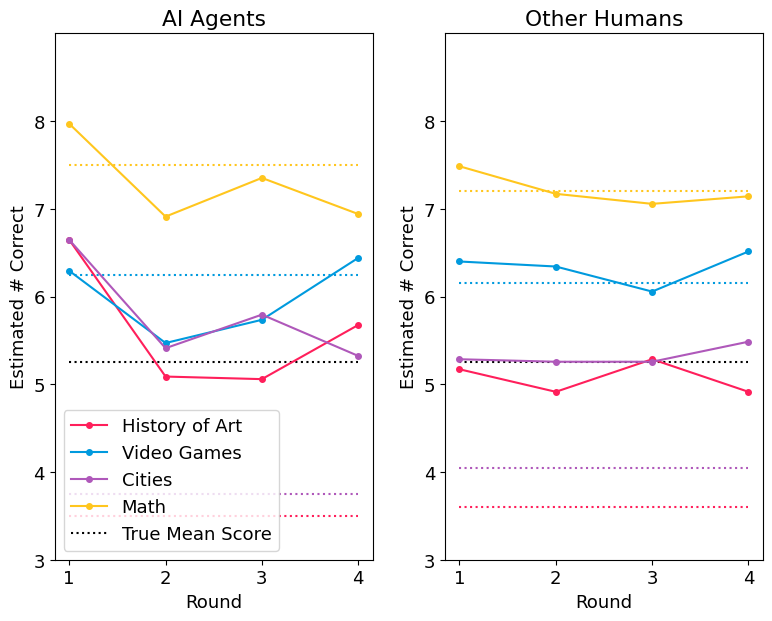

In [175]:
#plot_rounds(df_high,lim=(6,11),true_perfs=[good_AI_perf, good_hu_perf])
plot_rounds(df_low,lim=(3,8),true_perfs=[bad_AI_perf, bad_hu_perf])

# Plot self- vs. other-assessment

In [106]:
others = pd.read_csv('processed_data/clean_results.csv', index_col=0)

In [129]:
def get_vars(df_sub, cond):
    agent = others[np.logical_and(others['FeedbackCondition']==False,others['HumanCondition']==cond)]
    agent = agent.groupby('SelfAssessment').aggregate({'OtherAssessment':['mean','std']})
    y = agent['OtherAssessment']['mean']
    y_std = agent['OtherAssessment']['std']
    x = list(y.index)
    return x, y, y_std

In [130]:
x1,y1,ystd1 = get_vars(others, True) # format other human data
x2,y2,ystd2 = get_vars(others, False) # format AI agent data

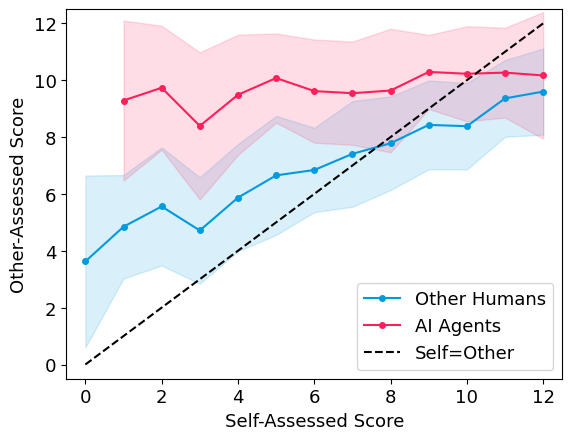

In [131]:
plt.plot(x1, y1, '#009ADE', marker='o',markersize=4,label='Other Humans')
plt.fill_between(x1, y1 - ystd1, y1 + ystd1, color='#009ADE', alpha=0.15)
plt.plot(x2, y2, '#FF1F5B', marker='o',markersize=4,label='AI Agents')
plt.fill_between(x2, y2 - ystd2, y2 + ystd2, color='#FF1F5B', alpha=0.15)
plt.plot(x1, x1, color='black', linestyle='dashed', label="Self=Other")
plt.legend(loc="lower right")
plt.xlabel("Self-Assessed Score")
plt.xlim(-0.5,12.5); plt.ylim(-0.5,12.5)
plt.ylabel("Other-Assessed Score")
plt.show()

In [132]:
others['Difference'] = others['OtherAssessment']-others['SelfAssessment']

In [113]:
sub = others[others['FeedbackCondition']==False]

In [134]:
stats.ttest_ind(a=sub[sub['HumanCondition']==True]['Difference'],
                b=sub[sub['HumanCondition']==False]['Difference'],
                equal_var=True)

Ttest_indResult(statistic=-17.046363485642296, pvalue=7.926639773138241e-58)

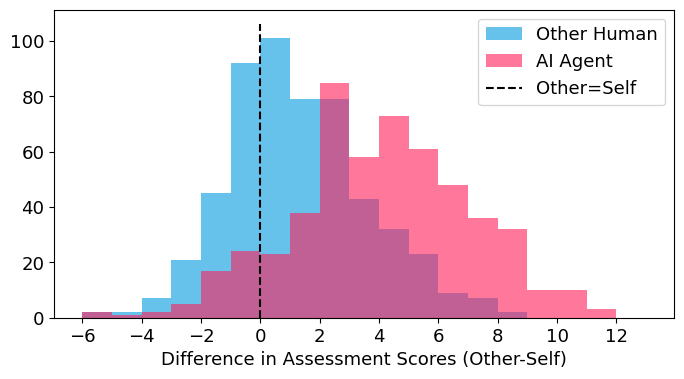

In [135]:
fig, ax = plt.subplots(figsize=(8,4))
plt.hist(sub[sub['HumanCondition']==True]['Difference'], label="Other Human", color='#009ADE',
         alpha=0.6, bins=[i for i in range(-6,14)])
plt.hist(sub[sub['HumanCondition']==False]['Difference'], label="AI Agent", color='#FF1F5B',
         alpha=0.6, bins=[i for i in range(-6,14)])
plt.xticks([i for i in range(-8,14,2)])
plt.vlines([0], ymin=0, ymax=plt.ylim()[1], color='black', linestyle='dashed', label="Other=Self")
plt.legend(loc='upper right')
plt.xlabel("Difference in Assessment Scores (Other-Self)")
plt.show()

# Plot assessments by problem set index

In [205]:
def get_smooth_rounds(df, highacc, var, human=None):
    '''for a given accuracy condition, agent type condition, and variable,
       return the smoothed, round-wise mean of that variable'''
    df_sub = df[df['GoodCondition']==highacc]
    if human is not None: 
        df_sub = df_sub[df_sub['HumanCondition']==human]
    df_sub = list(df_sub.groupby('Round').aggregate({var:'mean'})[var])
    return gaussian_filter1d(df_sub, sigma=1.4)

In [223]:
def agg_data(df,highacc):
    '''given an accuracy condition, generate smoothed, round-wise data
       on self-assessed, other-assessed, and true performances'''
    ai_s = get_smooth_rounds(others, highacc=highacc, var='OtherAssessment', human=False)
    hu_s = get_smooth_rounds(others, highacc=highacc, var='OtherAssessment', human=True)
    self_s = get_smooth_rounds(others, highacc=highacc, var='SelfAssessment')
    means = []
    # AI agents
    means.append(np.mean(others[np.logical_and(others['HumanCondition']==False,
                                                others['GoodCondition']==highacc)]['OtherPerformance']))
    # other humans
    means.append(np.mean(others[np.logical_and(others['HumanCondition']==True,
                                                others['GoodCondition']==highacc)]['OtherPerformance']))
    # self
    means.append(np.mean(others[others['GoodCondition']==highacc]['TruePerformance']))
    return ai_s, hu_s, self_s, means

In [206]:
def smooth_plot(ai, hu, self_, means, lim=[5,11],legend=False):
    ps = [i for i in range(1,17)]
    fig, ax = plt.subplots(figsize=(5,5))
    labels = ["AI Agent", "Other Human", "Self"]
    colors = ['#FF1F5B', '#009ADE', '#00CD6C']
    s=0.4
    for (y, l, c) in zip([ai, hu, self_],labels, colors): 
        plt.plot(ps, y, label=l, color=c)
        plt.fill_between(ps, y - s, y + s, color=c,alpha=0.2)
    plt.hlines(means, xmin=min(ps), xmax=max(ps), colors=colors, linestyle='dashed')
    plt.hlines([], xmin=min(ps), xmax=max(ps), colors='black', linestyle='dashed',label='True Mean Score')
    plt.ylim(lim); plt.yticks([i for i in range(lim[0],lim[1]+1)])
    plt.ylabel("Mean Assessed Score")
    plt.xticks([5,10,15])
    plt.xlabel("Problem Set")
    if legend:
        plt.legend()
    plt.show()

In [215]:
others = pd.read_csv('processed_data/clean_results.csv', index_col=0)
others['Round'] = [i for i in range(1,17)]*204
others = others[others['FeedbackCondition']==True]

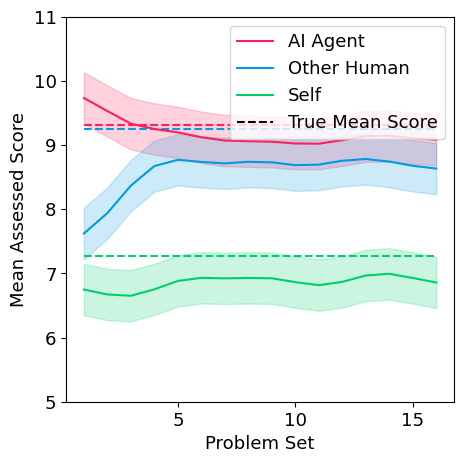

In [226]:
ai, hu, self_, means = agg_data(others,highacc=True)
smooth_plot(ai, hu, self_, means, legend=True)

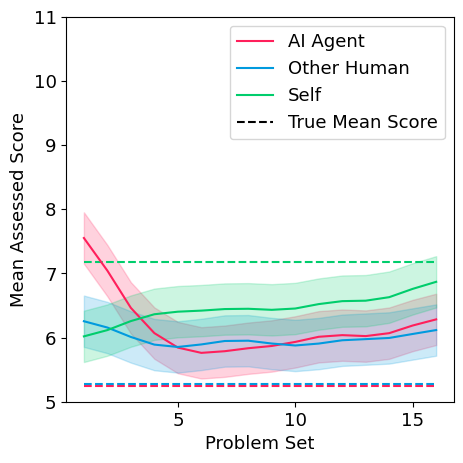

In [227]:
ai, hu, self_, means = agg_data(others,highacc=False)
smooth_plot(ai, hu, self_, means, legend=True)